In [94]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

In [95]:
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')

In [96]:
df_train.head()

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [97]:
# Note: factorize() returns two objects: a label array and an array with the unique values.
# We are only interested in the first object. 
df_train['NAME_CONTRACT_TYPE2'] = df_train.NAME_CONTRACT_TYPE.factorize()[0]
df_train['CODE_GENDER2'] = df_train.CODE_GENDER.factorize()[0]
df_train['FLAG_OWN_CAR2'] = df_train.FLAG_OWN_CAR.factorize()[0]
df_train['FLAG_OWN_REALTY2'] = df_train.FLAG_OWN_REALTY.factorize()[0]
df_train['NAME_TYPE_SUITE2'] = df_train.NAME_TYPE_SUITE.factorize()[0]
df_train['NAME_INCOME_TYPE2'] = df_train.NAME_INCOME_TYPE.factorize()[0]
df_train['NAME_EDUCATION_TYPE2'] = df_train.NAME_EDUCATION_TYPE.factorize()[0]
df_train['NAME_FAMILY_STATUS2'] = df_train.NAME_FAMILY_STATUS.factorize()[0]
df_train['NAME_HOUSING_TYPE2'] = df_train.NAME_HOUSING_TYPE.factorize()[0]
df_train['OCCUPATION_TYPE2'] = df_train.OCCUPATION_TYPE.factorize()[0]
df_train['WEEKDAY_APPR_PROCESS_START2'] = df_train.WEEKDAY_APPR_PROCESS_START.factorize()[0]
df_train['ORGANIZATION_TYPE2'] = df_train.ORGANIZATION_TYPE.factorize()[0]
df_train['FONDKAPREMONT_MODE2'] = df_train.FONDKAPREMONT_MODE.factorize()[0]
df_train['HOUSETYPE_MODE2'] = df_train.HOUSETYPE_MODE.factorize()[0]
df_train['WALLSMATERIAL_MODE2'] = df_train.WALLSMATERIAL_MODE.factorize()[0]
df_train['EMERGENCYSTATE_MODE2'] = df_train.EMERGENCYSTATE_MODE.factorize()[0]

df_test['NAME_CONTRACT_TYPE2'] = df_test.NAME_CONTRACT_TYPE.factorize()[0]
df_test['CODE_GENDER2'] = df_test.CODE_GENDER.factorize()[0]
df_test['FLAG_OWN_CAR2'] = df_test.FLAG_OWN_CAR.factorize()[0]
df_test['FLAG_OWN_REALTY2'] = df_test.FLAG_OWN_REALTY.factorize()[0]
df_test['NAME_TYPE_SUITE2'] = df_test.NAME_TYPE_SUITE.factorize()[0]
df_test['NAME_INCOME_TYPE2'] = df_test.NAME_INCOME_TYPE.factorize()[0]
df_test['NAME_EDUCATION_TYPE2'] = df_test.NAME_EDUCATION_TYPE.factorize()[0]
df_test['NAME_FAMILY_STATUS2'] = df_test.NAME_FAMILY_STATUS.factorize()[0]
df_test['NAME_HOUSING_TYPE2'] = df_test.NAME_HOUSING_TYPE.factorize()[0]
df_test['OCCUPATION_TYPE2'] = df_test.OCCUPATION_TYPE.factorize()[0]
df_test['WEEKDAY_APPR_PROCESS_START2'] = df_test.WEEKDAY_APPR_PROCESS_START.factorize()[0]
df_test['ORGANIZATION_TYPE2'] = df_test.ORGANIZATION_TYPE.factorize()[0]
df_test['FONDKAPREMONT_MODE2'] = df_test.FONDKAPREMONT_MODE.factorize()[0]
df_test['HOUSETYPE_MODE2'] = df_test.HOUSETYPE_MODE.factorize()[0]
df_test['WALLSMATERIAL_MODE2'] = df_test.WALLSMATERIAL_MODE.factorize()[0]
df_test['EMERGENCYSTATE_MODE2'] = df_test.EMERGENCYSTATE_MODE.factorize()[0]

In [99]:
X_train = np.array(df_train[['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','TOTALAREA_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','NAME_CONTRACT_TYPE2','CODE_GENDER2','FLAG_OWN_CAR2','FLAG_OWN_REALTY2','NAME_TYPE_SUITE2','NAME_INCOME_TYPE2','NAME_EDUCATION_TYPE2','NAME_FAMILY_STATUS2','NAME_HOUSING_TYPE2','OCCUPATION_TYPE2','WEEKDAY_APPR_PROCESS_START2','ORGANIZATION_TYPE2','FONDKAPREMONT_MODE2','HOUSETYPE_MODE2','WALLSMATERIAL_MODE2','EMERGENCYSTATE_MODE2']].fillna(0))
y = np.array(df_train.TARGET.fillna(0))

X_test = np.array(df_test[['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','TOTALAREA_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','NAME_CONTRACT_TYPE2','CODE_GENDER2','FLAG_OWN_CAR2','FLAG_OWN_REALTY2','NAME_TYPE_SUITE2','NAME_INCOME_TYPE2','NAME_EDUCATION_TYPE2','NAME_FAMILY_STATUS2','NAME_HOUSING_TYPE2','OCCUPATION_TYPE2','WEEKDAY_APPR_PROCESS_START2','ORGANIZATION_TYPE2','FONDKAPREMONT_MODE2','HOUSETYPE_MODE2','WALLSMATERIAL_MODE2','EMERGENCYSTATE_MODE2']].fillna(0))

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X_train, y).predict_proba(X_test)

y_pred

array([[0.94825767, 0.05174233],
       [0.91686698, 0.08313302],
       [0.97301196, 0.02698804],
       ...,
       [0.96571581, 0.03428419],
       [0.95853701, 0.04146299],
       [0.84930932, 0.15069068]])

In [111]:
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv('submission.csv',encoding = 'gbk')

In [107]:
decision_prob = 0.1
y_prob = lda.fit(X_train, y).predict_proba(X_train)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_prob[:,1] > decision_prob})
df_.replace(to_replace={0:'No', 1:'Yes', 'True':'Yes', 'False':'No'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status           No    Yes
Predicted default status               
False                     216154  11232
True                       66532  13593

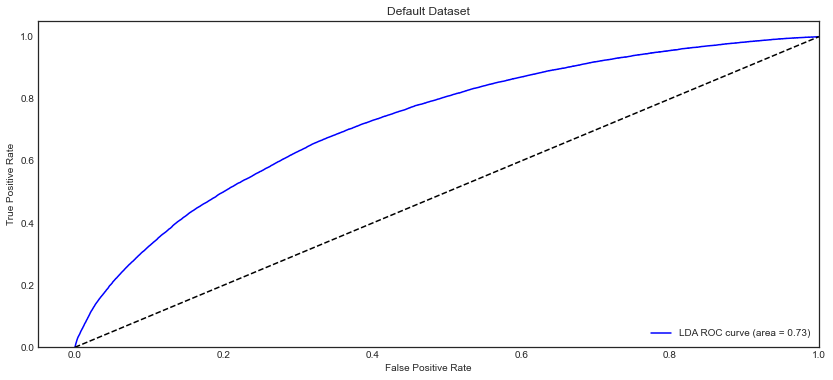

In [108]:
# ROC curve of LDA
false_pos_rate1, true_pos_rate1, _ = roc_curve(y, y_prob[:,1])
roc_auc1 = auc(false_pos_rate1, true_pos_rate1)

fig, (ax1) = plt.subplots(1, 1, figsize=(14,6))
ax1.plot(false_pos_rate1, true_pos_rate1, label='LDA ROC curve (area = %0.2f)' % roc_auc1, color='b')
ax1.set_title('Default Dataset')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

In [110]:
roc_auc1

0.727226436566119